<a href="https://colab.research.google.com/github/helennzhangg/finding-heights/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Helen Zhang 
#CIS 3120 
#Project 1 

In [ ]:
#use of beautiful soup + pandas in this project 
from bs4 import BeautifulSoup 
import requests
import pandas as pd

In [ ]:
#dictionary with all the teams + urls to better organize 
sportsteams = {
                  'MensVolleyball'   : ['https://ccnyathletics.com/sports/mens-volleyball/roster', 'https://lehmanathletics.com/sports/mens-volleyball/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster', 'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster', 'https://ballstatesports.com/sports/mens-volleyball/roster', 'https://lewisflyers.com/sports/mens-volleyball/roster'],
                  'WomensVolleyball' : ['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster', 'https://hostosathletics.com/sports/womens-volleyball/roster', 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021', 'https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 'https://flaglerathletics.com/sports/womens-volleyball/roster', 'https://yhcathletics.com/sports/womens-volleyball/roster', 'https://pacersports.com/sports/womens-volleyball/roster', 'https://www.golhu.com/sports/womens-volleyball/roster'],
                  'MensSwimmingandDiving'     : ['https://csidolphins.com/sports/mens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'],
                  'WomensSwimmingandDiving'   : ['https://csidolphins.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']
              }


In [ ]:
#function to obtain the goals 
def namesheights(teamtype, url):
  #processing names + heights 
  #creating empty lists for names + heights of players 
  names = []    
  heights = []  
  for urls in url:
    #make request from server                           
    page = requests.get(urls)    
    #import raw html to bsoup                        
    soup = BeautifulSoup (page.content, 'html.parser') 

    #scrap raw heights 
    rawheights = soup.find_all('td', class_ = 'height')
    #scrap raw names
    rawnames = soup.find_all('td', class_ = 'sidearm-table-player-name')  

    #cont. names list + strip '\n'
    for name in rawnames:     #creating a loop for height tags 
      names.append(name.get_text().strip()) #append cont. heights list
    
    #cont. heights list + finding avg
    for height in rawheights:     #creating a loop for height tags 
      x = height.get_text()
    
      #some heights aren't shown, so it is skipped 
      #https://www.digitalocean.com/community/tutorials/how-to-use-break-continue-and-pass-statements-when-working-with-loops-in-python-3
      if x == '-':
        heights.append(x)
        continue
      #split function with string to float + * 12 for feet
      feet = float(x.split('-')[0]) * 12
      inch = float(x.split('-')[1])

      #total inch of players 
      total = feet + inch

      #total height cont. 
      heights.append(total)

  #finding the average 
  total = 0 
  #finding the total of all the values in the list, excluding '-'
  for x in range(0, len(heights)):
    if heights[x] != '-':
      total += heights[x]
  averageheight = total / len(heights)

  #replacing the '-' with the average height
  for x in range(0, len(heights)):
    if heights[x] == '-':
      heights[x] = averageheight 

  #creating a csv file
  filename = teamtype + '.csv'
  #loading the csv file into a dataframe
  df = pd.DataFrame()
  #variable names 
  df['Names'] = names
  df['Heights'] = heights
  df.to_csv(filename, index=False)
  return df


In [ ]:
#creating seperate data frames for each team
MensVolleyball_df = namesheights('MensVolleyball', sportsteams['MensVolleyball'])
WomensVolleyball_df = namesheights('WomensVolleyball', sportsteams['WomensVolleyball'])
MensSwimmingandDiving_df = namesheights('MensSwimmingandDiving', sportsteams['MensSwimmingandDiving'])
WomensSwimmingandDiving_df = namesheights('WomensSwimmingandDiving', sportsteams['WomensSwimmingandDiving'])

In [ ]:
#dataframe of all the player's name + height of mens volleyball team
MensVolleyball_df

,Names,Heights
0,Jeffrey Celis,69.0
1,Reng Chen,69.0
2,Edwin Fierros Gaytan,68.0
3,Fred De La Cuadra,70.0
4,Utpal Chand,69.0
...,...,...
127,Carter Burzlaff,79.0
128,Chase Celichowski,78.0
129,John Davis,77.0
130,Christian Prayer,76.0


In [ ]:
#dataframe of all the player's name + height of womens volleyball team
WomensVolleyball_df

,Names,Heights
0,Jaylina Kraker,59.0
1,Kaylin Nieves,62.0
2,Alyssa Duran,65.0
3,Vielka De Jesus Segura,67.0
4,Nolverys Fernandez,65.0
...,...,...
128,Hannah Lingold,70.0
129,Meghan Tennant,75.0
130,Samantha Arens-Ennis,65.0
131,Krystal Heffelfinger,71.0


In [ ]:
#dataframe of all the player's name + height of mens swimming + diving team
MensSwimmingandDiving_df

,Names,Heights
0,Daniel Angulo,70.760234
1,Anthony Attenborough,70.000000
2,Charles Cusumano,64.000000
3,Eslam Hussein,70.000000
4,Chris Ivanov,75.000000
...,...,...
166,Kieran Hassard,72.000000
167,Anthony Laite,69.000000
168,Drew MacDonald,72.000000
169,Kyle Morken,73.000000


In [ ]:
#dataframe of all the player's name + height of womens swimming + diving team
WomensSwimmingandDiving_df

,Names,Heights
0,Kathleen Bridgman,65.000000
1,Angye Galan,63.434483
2,Jessica Johnson,68.000000
3,Macy Jones-Busch,63.434483
4,Bridget Mulvey,67.000000
...,...,...
140,Paige Splendido,65.000000
141,Emma Stephenson,67.000000
142,Callie Stinson,64.000000
143,Jessie Triller,62.000000


In [ ]:
#finding the average height of all the teams based on the dataframe
#using the .mean() function from pandas 
MensVolleyballAvg = MensVolleyball_df['Heights'].mean()
WomensVolleyballAvg = WomensVolleyball_df['Heights'].mean()
MensSwimmingandDivingAvg = MensSwimmingandDiving_df['Heights'].mean()
WomensSwimmingandDivingAvg = WomensSwimmingandDiving_df['Heights'].mean()

#labeling variables of team name and average height
AverageHeights = pd.DataFrame(
                {
  'Team': ['Mens Volleyball Team', 'Womens Volleyball Team', 'Mens Swimming and Diving', 'Womens Swimming and Diving'],
  'Average Height': [MensVolleyballAvg, WomensVolleyballAvg, MensSwimmingandDivingAvg, WomensSwimmingandDivingAvg]

                }
                              )

In [ ]:
AverageHeights

,Team,Average Height
0,Mens Volleyball Team,73.037879
1,Womens Volleyball Team,67.413534
2,Mens Swimming and Diving,71.587839
3,Womens Swimming and Diving,65.621879


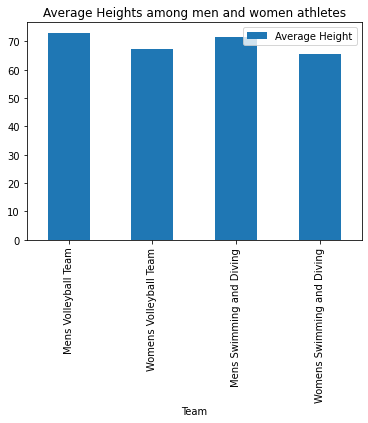

In [ ]:
#bar graph of the average heights from above 
#rotating the x axis 90 degrees to view team names 
#rot = rotation
AverageHeights.plot.bar(x='Team', y='Average Height', rot = 90, title = 'Average Heights among men and women athletes') 

In [ ]:
#Tallest 5 Mens Volleyball Player's Heights
#get a list of unique values in a pandas column 
UniqueHeights = list(MensVolleyball_df['Heights'].unique())

#reverse = True makes it tallest to shortest 
UniqueHeights.sort(reverse = True)

#representing the 5th tallest height
FifthTallest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = MensVolleyball_df['Heights'] >= FifthTallest
tallestmensvballplayers = MensVolleyball_df[filtermask]
tallestmensvballplayers.sort_values(by = 'Heights', ascending = False)

,Names,Heights
117,Tyler Mitchem,83.0
111,Tyler Simpson,82.0
100,Mark Wickstrom,81.0
125,Michael Sack,81.0
116,Isaac Benka,81.0
114,Kevin Kauling,80.0
118,Max Roquet,80.0
102,Will Hippe,80.0
126,Antonio Rodriguez,80.0
119,Alec Lehnert,80.0


In [ ]:
#Shortest 5 Mens Volleyball Player's Heights
#get a list of unique values in a pandas olumn 
UniqueHeights = list(MensVolleyball_df['Heights'].unique())

#reverse = False makes it shortest to tallest 
UniqueHeights.sort(reverse = False)

#representing the 5th tallest height
FifthShortest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = MensVolleyball_df['Heights'] >= FifthShortest
shortestmensvballplayers = MensVolleyball_df[filtermask]
shortestmensvballplayers.sort_values(by = 'Heights')

,Names,Heights
2,Edwin Fierros Gaytan,68.0
71,Raymond Yu,68.0
14,Kemp Brian Dullin,68.0
0,Jeffrey Celis,69.0
33,Stephen Daly,69.0
...,...,...
116,Isaac Benka,81.0
125,Michael Sack,81.0
100,Mark Wickstrom,81.0
111,Tyler Simpson,82.0


In [ ]:
#Tallest 5 Womens Volleyball Player's Heights
#get a list of unique values in a pandas column 
UniqueHeights = list(WomensVolleyball_df['Heights'].unique())

#reverse = True makes it tallest to shortest 
UniqueHeights.sort(reverse = True)

#representing the 5th tallest height
FifthTallest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = WomensVolleyball_df['Heights'] >= FifthTallest
tallestwomensvballplayers = WomensVolleyball_df[filtermask]
tallestwomensvballplayers.sort_values(by = 'Heights', ascending = False)

,Names,Heights
129,Meghan Tennant,75.0
126,Alyssa Daley,75.0
75,Molly Boyd,75.0
94,Sophie Bearden,75.0
71,Logan Garcia,74.0
73,McKenzie Eaves,74.0
91,Jessica Beckner,73.0
114,Anna Sommer,73.0
60,Radka Brichackova,73.0
92,Haley King,73.0


In [ ]:
#Shortest 5 Womens Volleyball Player's Heights
#get a list of unique values in a pandas olumn 
UniqueHeights = list(WomensVolleyball_df['Heights'].unique())

#reverse = False makes it shortest to tallest 
UniqueHeights.sort(reverse = False)

#representing the 5th tallest height
FifthShortest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = WomensVolleyball_df['Heights'] >= FifthShortest
shortestwomensvballplayers = WomensVolleyball_df[filtermask]
shortestwomensvballplayers.sort_values(by = 'Heights')

,Names,Heights
48,Emma Davern,63.0
106,Lily Andrews,63.0
115,Riley Runk,63.0
7,Quiana Baez,63.0
33,Maynee De Los Santos,64.0
...,...,...
71,Logan Garcia,74.0
94,Sophie Bearden,75.0
126,Alyssa Daley,75.0
129,Meghan Tennant,75.0


In [ ]:
#Tallest 5 Mens Swimmmers and Divers Heights
#get a list of unique values in a pandas column 
UniqueHeights = list(MensSwimmingandDiving_df['Heights'].unique())

#reverse = True makes it tallest to shortest 
UniqueHeights.sort(reverse = True)

#representing the 5th tallest height
FifthTallest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = MensSwimmingandDiving_df['Heights'] >= FifthTallest
tallestmensswimmingplayers = MensSwimmingandDiving_df[filtermask]
tallestmensswimmingplayers.sort_values(by = 'Heights', ascending = False)

,Names,Heights
79,Colton Grimes,78.0
113,Josh Templeton,78.0
20,Kasper Gacek,77.0
148,Eric Kroon,77.0
42,Jerry Brown,77.0
54,Zach Linder,77.0
71,Owen Brubaker,76.0
93,Xander Skinner,76.0
62,Evan Root,76.0
95,Gavin Wagner,76.0


In [ ]:
#Shortest 5 Mens Swimmmers and Divers Heights
#get a list of unique values in a pandas column 
UniqueHeights = list(MensSwimmingandDiving_df['Heights'].unique())

#reverse = False makes it shortest to tallest 
UniqueHeights.sort(reverse = False)

#representing the 5th tallest height
FifthShortest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = MensSwimmingandDiving_df['Heights'] >= FifthShortest
shortestmensswimmingplayers = MensSwimmingandDiving_df[filtermask]
shortestmensswimmingplayers.sort_values(by = 'Heights')

,Names,Heights
129,Daniel Oh,68.0
37,Tristan Scotland,68.0
99,Alessandro Alvarez,68.0
23,Fernando Marroquin,68.0
100,Giovanni Alvarez,68.0
...,...,...
54,Zach Linder,77.0
42,Jerry Brown,77.0
148,Eric Kroon,77.0
79,Colton Grimes,78.0


In [ ]:
#Tallest 5 Womens Swimmmers and Divers Heights
#get a list of unique values in a pandas column 
UniqueHeights = list(WomensSwimmingandDiving_df['Heights'].unique())

#reverse = True makes it tallest to shortest 
UniqueHeights.sort(reverse = True)

#representing the 5th tallest height
FifthTallest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = WomensSwimmingandDiving_df['Heights'] >= FifthTallest
tallestwomensswimmingplayers = WomensSwimmingandDiving_df[filtermask]
tallestwomensswimmingplayers.sort_values(by = 'Heights', ascending = False)

,Names,Heights
45,Kamilla Shulanova,72.0
89,Hallie Dixon,71.0
55,Isabella Gable,71.0
86,Claire Brouillet,71.0
94,Presley Heitzmann,71.0
98,Haley Rey,71.0
58,Shelby Kasse,70.0
127,Erin Clune,70.0
60,Stephanie Marks,70.0
50,Elle Christie,69.0


In [ ]:
#Shortest 5 Womens Swimmmers and Divers Heights
#get a list of unique values in a pandas olumn 
UniqueHeights = list(WomensSwimmingandDiving_df['Heights'].unique())

#reverse = False makes it shortest to tallest 
UniqueHeights.sort(reverse = False)

#representing the 5th tallest height
FifthShortest = UniqueHeights [4]

#listing all of the men athlethes greater or equal to using filter mask
filtermask = WomensSwimmingandDiving_df['Heights'] >= FifthShortest
shortestwomensswimmingplayers = WomensSwimmingandDiving_df[filtermask]
shortestwomensswimmingplayers.sort_values(by = 'Heights')

,Names,Heights
62,Beata Maruszczyk,63.0
31,Dea Gazheli,63.0
85,Hallie Anderson,63.0
15,Jillian Etnel,63.0
133,Melissa Kelly,63.0
...,...,...
89,Hallie Dixon,71.0
94,Presley Heitzmann,71.0
98,Haley Rey,71.0
55,Isabella Gable,71.0


In [ ]:
#calling the function: namesheights with items in sportsteams
for key, value in sportsteams.items():            
  namesheights(key,value) 

In [ ]:
numbers = ['1','2','3']
sum = 0